In [1]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

In [2]:
class GBRegressor:
    def __init__(self, 
                 n_estimators, 
                 learning_rate=1., 
                 max_depth=3, 
                 min_samples_split=2, 
                 min_samples_leaf=1):
        
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.estimators = []

    def stagewise(self, X, y):
        # fit residual
        estimator = DecisionTreeRegressor(max_depth=self.max_depth,
                                           min_samples_split=self.min_samples_split,
                                           min_samples_leaf=self.min_samples_leaf)
        estimator.fit(X, y)
        self.estimators.append(estimator)
        y_pred = estimator.predict(X)
        y -= self.learning_rate * y_pred
        return y

    def fit(self, X, y):
        res = np.copy(y)
        for m in range(self.n_estimators):
            res = self.stagewise(X, res)

    def predict(self, X, n_trees=None): # Use the first n trees for prediction
        if n_trees == None:
            pred = sum(estimator.predict(X) for estimator in self.estimators)
            return self.learning_rate * pred
        else:
            pred = sum(estimator.predict(X) for estimator in self.estimators[:n_trees])
            return self.learning_rate * pred
    
    def plot(self, X, y):
        fig = plt.figure()
        xx = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
        plt.plot(xx, self.predict(xx), 'g', label=r'GBT')
        plt.plot(X, y, 'b.', markersize=6, label=u'Observations')
        plt.legend(loc='upper right')
        plt.show()

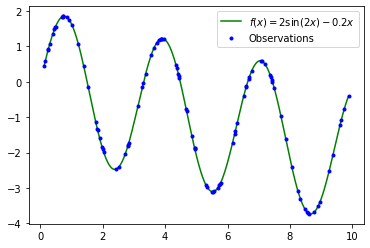

In [3]:
def f(x):
    return 2 * np.sin(2 * x) - 0.2 * x

X = rng.uniform(0, 10, size=100).reshape(-1, 1)
y = f(X).reshape(-1,)
# Plot ground truth
xx = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
fig = plt.figure()
plt.plot(xx, f(xx), 'g', label=r'$f(x) = 2\sin(2x)-0.2x$')
plt.plot(X, y, 'b.', markersize=6, label=u'Observations')
plt.legend(loc='upper right')
plt.show()

In [4]:
model = GBRegressor(n_estimators=100, learning_rate=1.)
model.fit(X, y)

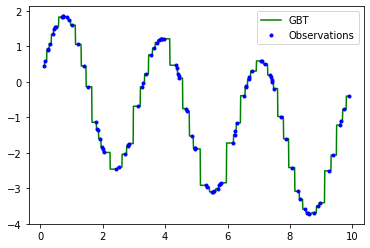

In [5]:
model.plot(X, y)